<a href="https://colab.research.google.com/github/CrasCris/Ejemplo1/blob/main/Simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

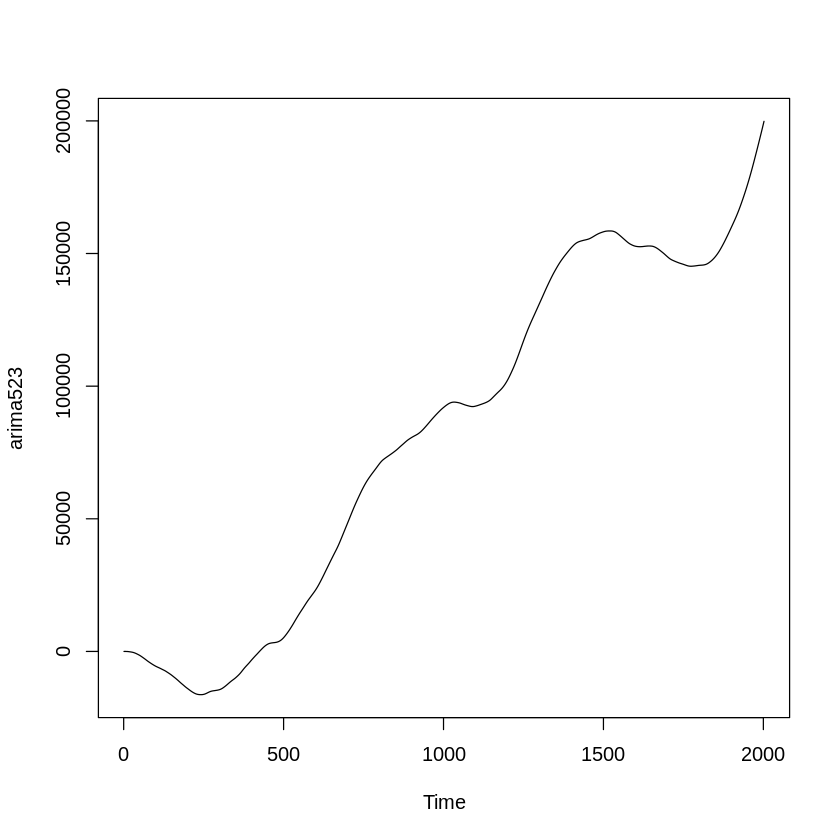

In [8]:
#Vamos a generar una serie de datos
arima523 <- arima.sim(n=2000, list(ar=c(0.2, 0.4, 0.1, 0.1, 0.1), ma=c(0.1, 0.2, 0.4), order=c(5,2,3))) #(p=5,d=2,q=3)
plot(arima523)

In [3]:
options(scipen=999) #Este comando es para cambiar la notación cientifica de las graficas

In [2]:
#Instalar paquetes
install.packages('forecast')
install.packages("TSA")
install.packages("stats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”


In [ ]:
# Leer paquetes
library(forecast)
library(TSA)
library(stats)

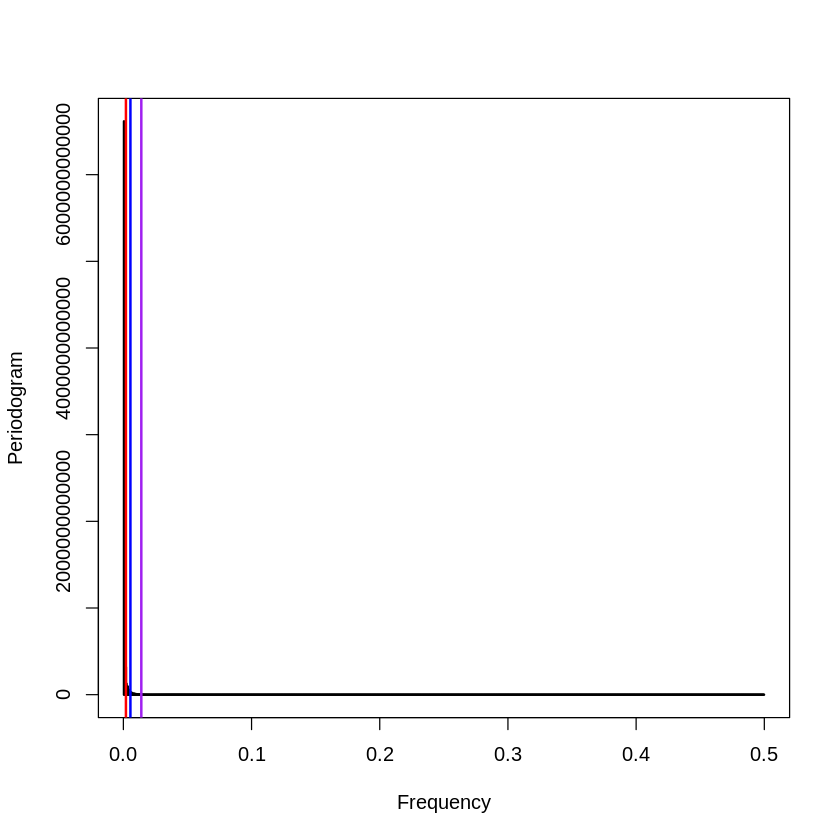

In [25]:
#Realizamos el periodograma para poder encontrar una frecuencia donde se observe un comportamiento estacional
periodogram(arima523)
abline(v=0.0055, col="blue",lwd=2)
abline(v=0.014, col="purple",lwd=2)
abline(v=0.002, col="red",lwd=2)
s_1=1/0.0055
s_2=1/0.014
s_3=1/0.002

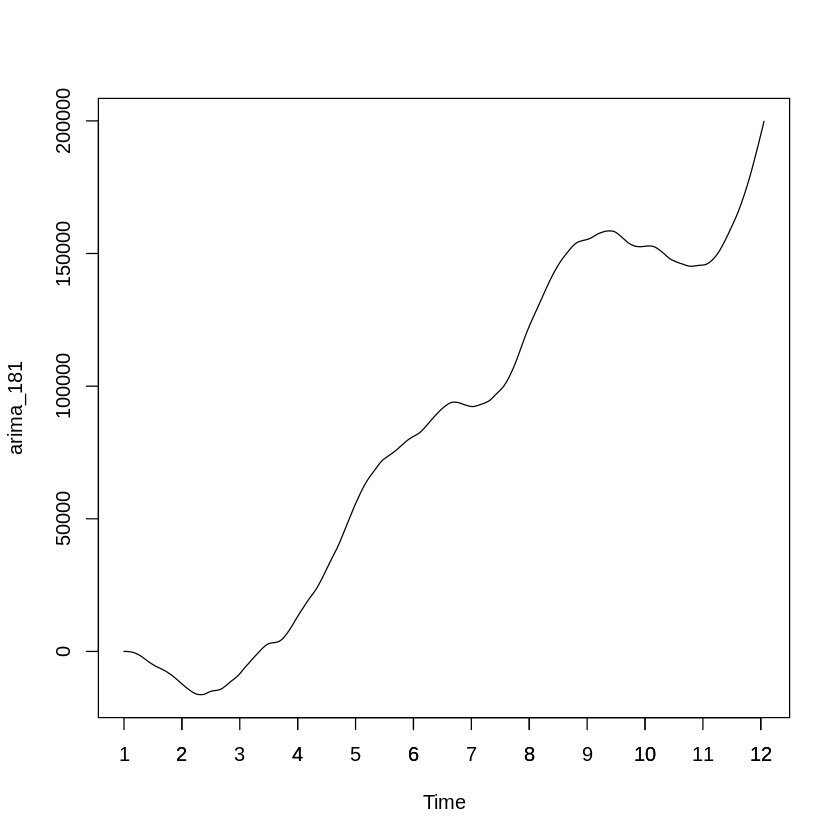

In [10]:
#Vamos a tomar la frecuencia de la linea azul, que corresponde a S=181 aprox
arima_181<-ts(arima523,frequency = 181)
plot(arima_181)
axis(side = 1,c(1,2,3,4,5,6,7,8,9,10,11,12))
#En el eje x, podemos ver el tiempo para cada 181 dias

In [11]:
ndiffs(arima_181) #Con o sin esta funcion queda el mismo numero de diferencias para que la serie sea estacionaria d=2

[1] 2

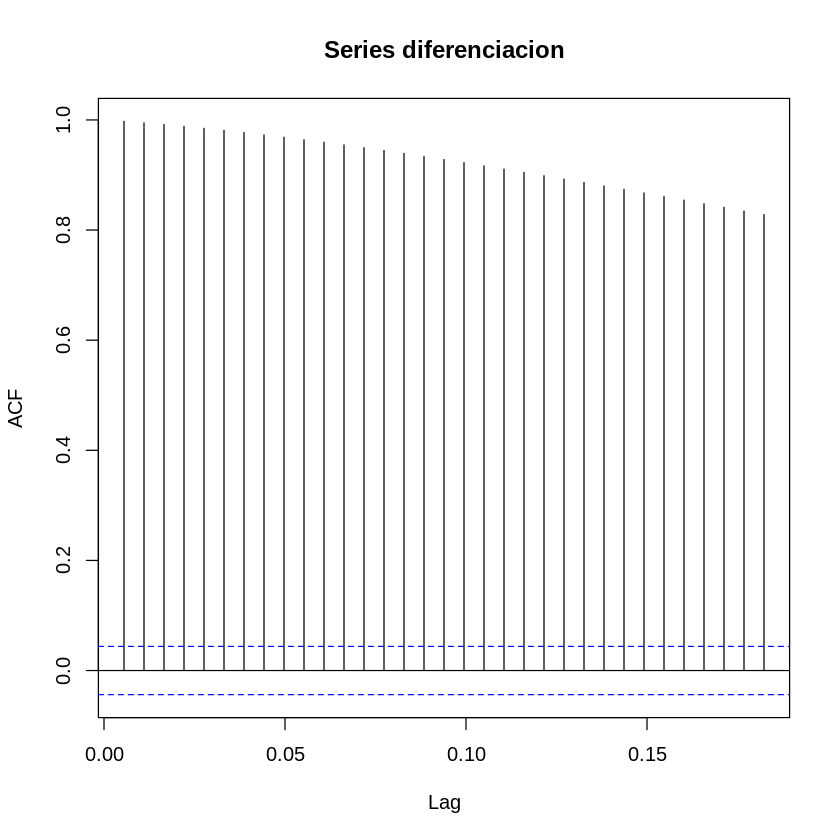

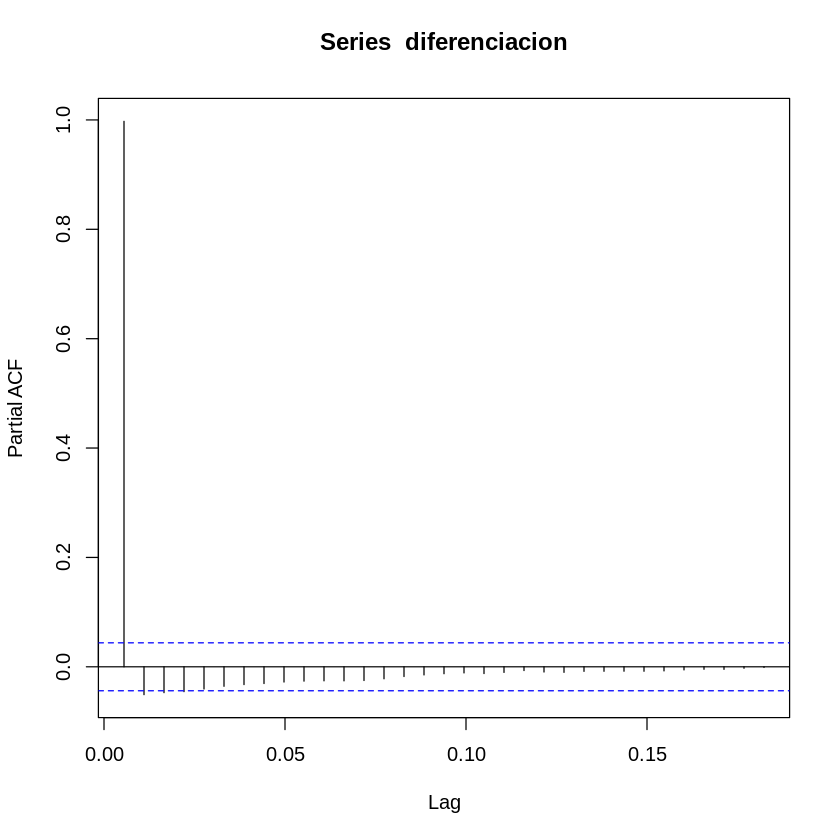

In [12]:
#Calculo del orden de p y q
diferenciacion <- diff(arima_181, 2)
acf(diferenciacion) # Orden q
pacf(diferenciacion) # Orden p

#En la función de ACF hay muchos valores significativos (practicamente todos), ya que se salen de valor de significancia para poder rechazarlos, comparando con la Partial ACF , que solo nos muestra 1.
#Para que el orden no sea muy alto y ocacionar problemas de overfitting en nuestra predicción tomaremos los valores de q=5 y p=4.

In [ ]:
#Calculo de los criterios de Akaike, que son los que maximizan la funcion de maxima verosimilitud
matriz_4 = matrix(0, ncol = 4, nrow = 4)
for (i in 0:3) {
  for (j in 0:3) {
    matriz_4[i+1,j+1] = AIC(arima(arima523,
                                  order = c(4, 2, 5),
                                  seasonal = list(order = c(i, 0, j),
                                                  period = 181)))}}

matriz_4
min(matriz_4[which(matriz_4 > 0)])#(0,0,0)

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”


In [31]:
AIC(Arima(arima523,order=c(4,2,5),seasonal=list(order=c(0,0,0),period=181))) # Este es el menor con el criterio de Akaike

[1] 5658.618

In [33]:
arima_125_000=Arima(arima523,order=c(1,2,5),seasonal=list(order=c(0,0,0),period=181))

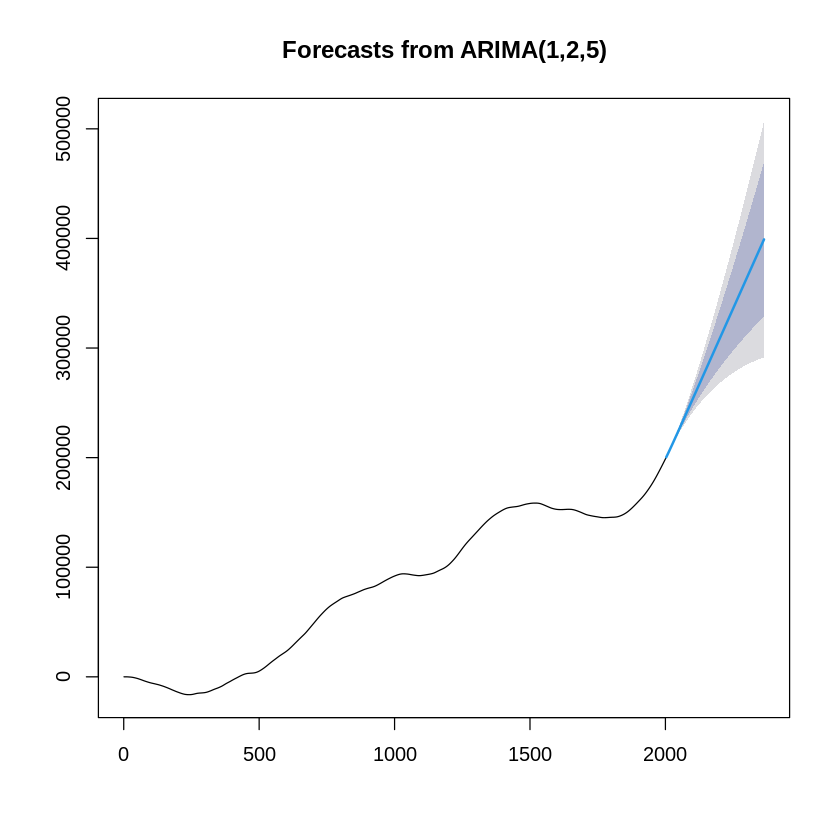

In [17]:
plot(forecast(arima_125_000))

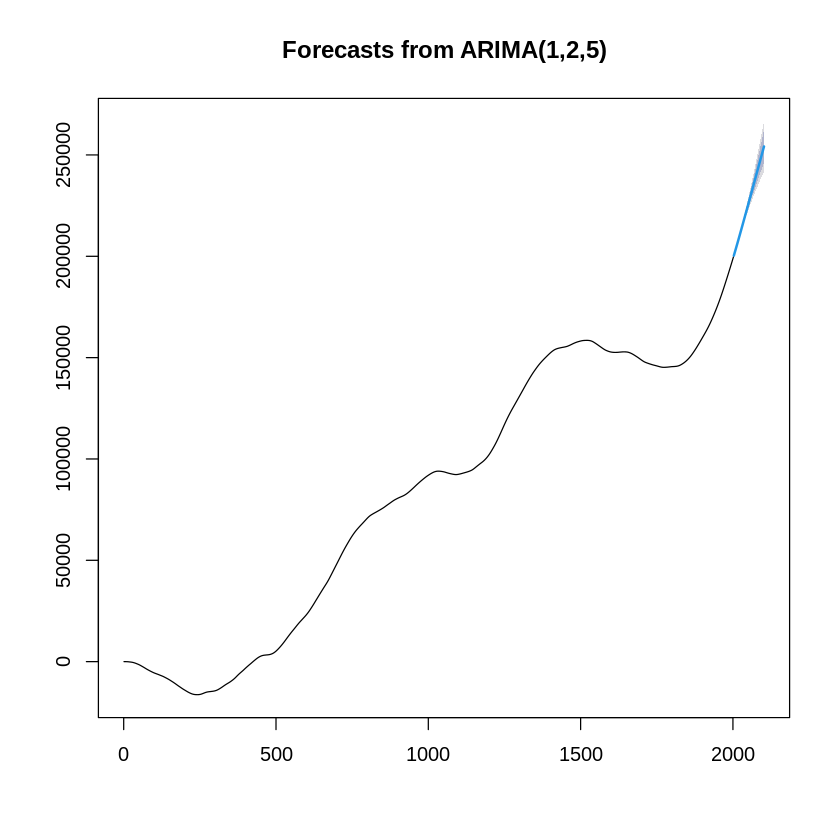

In [34]:
# Predicción para 100 valores
plot(forecast(arima_125_000,h=100))

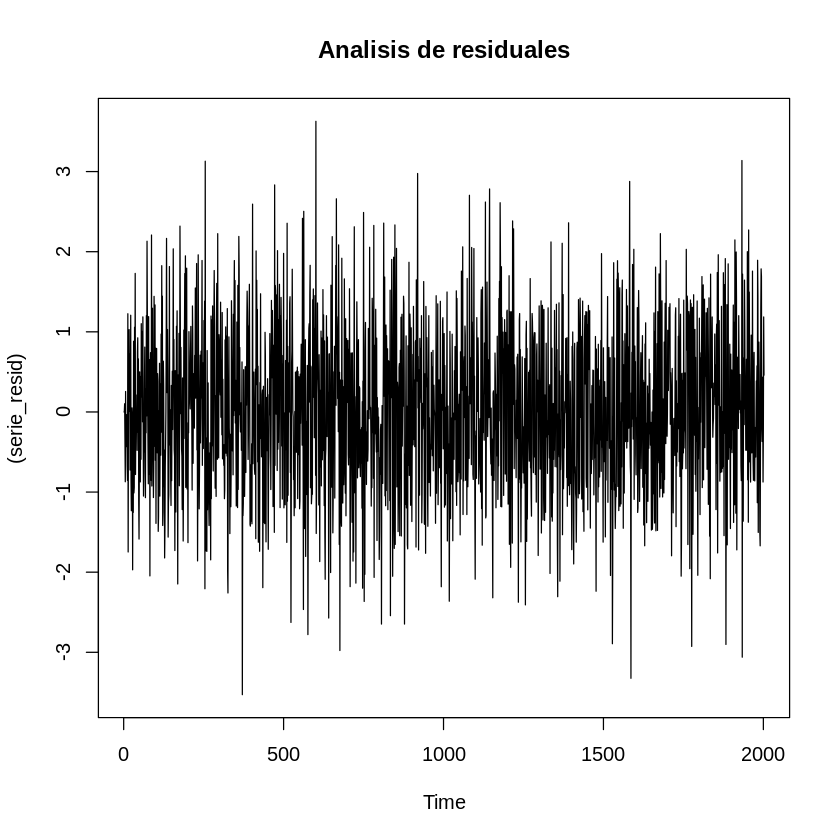

In [35]:
#Analisis de los residuales
serie_resid <- ts(arima_125_000$residuals)
plot((serie_resid),main="Analisis de residuales")

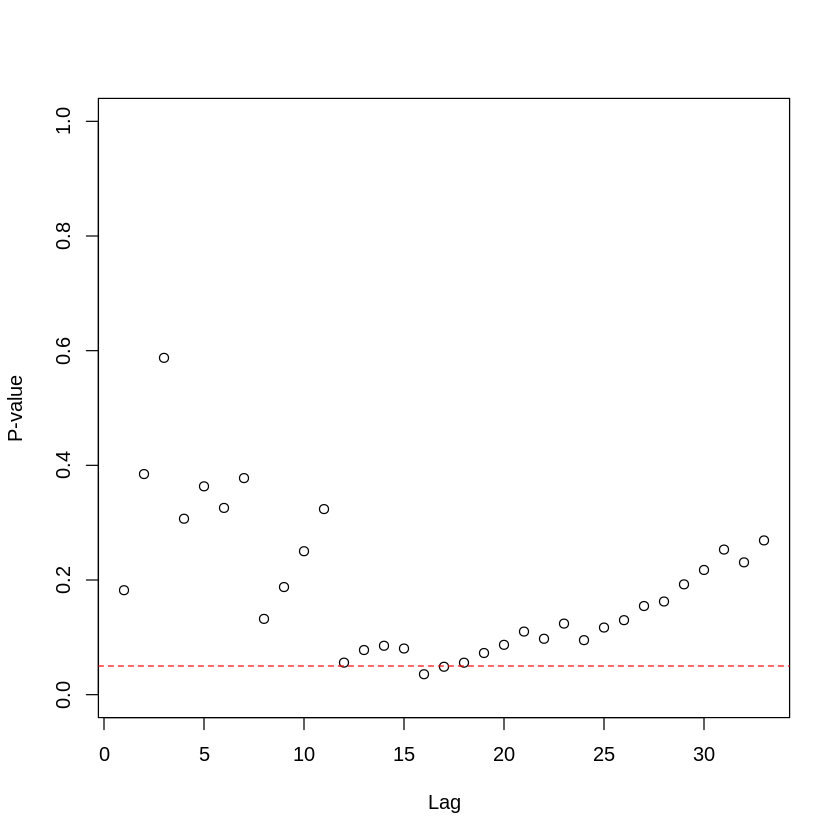

In [36]:
McLeod.Li.test(arima_125_000)

In [ ]:
#Condigo para la simulacion de un modelo GARCH